In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
import matplotlib.pyplot as plt



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


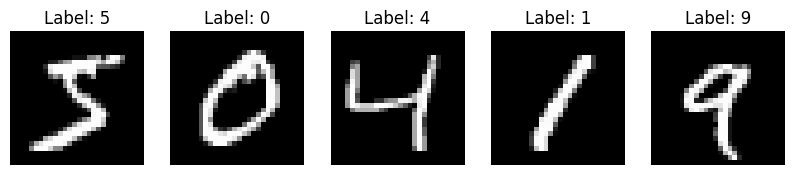

In [23]:

# Load the MNIST dataset (28x28 images)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values (0-255 → 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten the 28x28 images into 1D vectors (28x28 → 784)
X_train_flat = X_train.reshape(len(X_train), -1)  # 784 feature vectors
X_test_flat = X_test.reshape(len(X_test), -1)  

# Show a few samples from the dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 4))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i], cmap="gray")
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis("off")
plt.show()


In [37]:
# Train K-Means on 28x28 (flattened) images
kmeans = KMeans(n_clusters=10, random_state=42, max_iter=800, n_init=10, tol=1e-4)
kmeans.fit(X_train_flat)

KMeans(max_iter=800, n_clusters=10, n_init=10, random_state=42)

In [38]:
# Assign each cluster to the most common actual digit label
cluster_labels = np.zeros(10)
for i in range(10):
    mask = (kmeans.labels_ == i)
    cluster_labels[i] = mode(y_train[mask])[0]  # Get most frequent digit in each cluster

print("Cluster-to-Digit Mapping for 28x28 Images:")
for i in range(10):
    print(f"Cluster {i} → Digit {int(cluster_labels[i])}")

Cluster-to-Digit Mapping for 28x28 Images:
Cluster 0 → Digit 6
Cluster 1 → Digit 1
Cluster 2 → Digit 8
Cluster 3 → Digit 2
Cluster 4 → Digit 0
Cluster 5 → Digit 1
Cluster 6 → Digit 7
Cluster 7 → Digit 4
Cluster 8 → Digit 3
Cluster 9 → Digit 0


In [39]:

# Flatten the 28x28 images into 1D vectors (28x28 → 784)
X_test_flat = X_test.reshape(len(X_test), -1)  

# Predict labels for test data
y_pred_clusters = kmeans.predict(X_test_flat)
y_pred = cluster_labels[y_pred_clusters].astype(int)

# Calculate classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"K-Means Classification Accuracy: {accuracy * 100:.2f}%")

K-Means Classification Accuracy: 59.50%


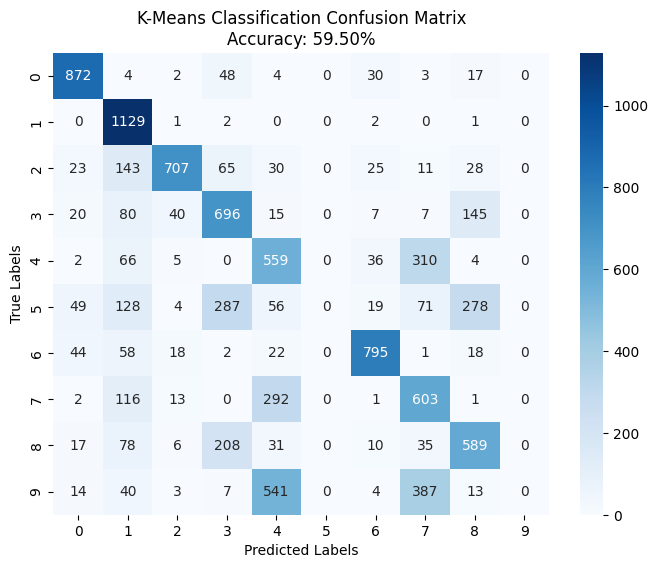

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"K-Means Classification Confusion Matrix\nAccuracy: {accuracy * 100:.2f}%")
plt.show()
